### Building a Convolutional Neural Network model on the quick draw data set

In [106]:
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator


In [107]:
from keras.callbacks import ModelCheckpoint

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [109]:
img_size = (28, 28, 1)
layer_sizes = (128, 64)
n_filters = (32, 64, 128)
kernel_sizes = (7, 3, 3)
pool_size = 2
drop_prob = 0.5


n_classes = 345   #output_dim/units is equal to the number of image classes

In [110]:
model = Sequential([Convolution2D(filters = 32,
                        kernel_size = (3,3),
                        activation = "relu",
                        input_shape = img_size),
                    Convolution2D(filters = 32,
                        kernel_size = (3,3),
                        activation = "relu"),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(.20),
                    Convolution2D(filters = 64,
                        kernel_size = (3,3),
                        activation = "relu"),
                    Convolution2D(filters = 64,
                        kernel_size = (3,3),
                        activation = "relu"),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(.1),
                    Flatten(),
                    Dense(512, activation="relu"),
                    Dense(n_classes, activation="softmax") 
                   ])

In [111]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 64)         

### Training the model

In [96]:
train_path = "datasets/data/train_set/"
test_path = "datasets/data/test_set/"

data_file_path = "datasets/data/numpy_bitmap"

In [98]:
train_datagen2 = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode='nearest')



test_datagen2 = ImageDataGenerator(rescale=1./255)

In [99]:
%%time

training_set = train_datagen.flow_from_directory(
        train_path,
        target_size=(28, 28),
        color_mode="grayscale",
        batch_size=256,
        class_mode='categorical')

Found 2760000 images belonging to 345 classes.
Wall time: 1min 39s


In [100]:
%%time

test_set = test_datagen.flow_from_directory(
        test_path,
        target_size=(28, 28),
        color_mode="grayscale",
        batch_size=256,
        class_mode='categorical')

Found 690000 images belonging to 345 classes.
Wall time: 28.6 s


In [112]:
model.compile(optimizer = "nadam", loss="categorical_crossentropy", metrics=["accuracy"])

In [113]:
save_cb = ModelCheckpoint("conv_doodle_model.h5",
                          save_best_only=True)

In [114]:
from keras.callbacks import TensorBoard

In [115]:
%%time

history = model.fit(
            training_set,
            steps_per_epoch=training_set.n//training_set.batch_size,
            epochs=15,
            validation_data=test_set,
            validation_steps=test_set.n//test_set.batch_size, 
            callbacks=[save_cb, TensorBoard(log_dir="QuickDraw")])



#history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=5, batch_size=256,
#          callbacks=[TensorBoard(log_dir="QuickDraw"), save_cb])



Epoch 1/15
    2/10781 [..............................] - ETA: 1:25:11 - loss: 5.8444 - accuracy: 0.0020    

C:\Users\nitin\AppData\Local\Continuum\anaconda3\envs\nitin\lib\site-packages\keras\callbacks\callbacks.py:92: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.561512). Check your callbacks.
  warnings.warn(


10781/10781 [==============================] - 5925s 550ms/step - loss: 1.8225 - accuracy: 0.5713 - val_loss: 1.3189 - val_accuracy: 0.6420
Epoch 2/15
10781/10781 [==============================] - 6863s 637ms/step - loss: 1.5114 - accuracy: 0.6338 - val_loss: 1.4645 - val_accuracy: 0.6531
Epoch 3/15
10781/10781 [==============================] - 6667s 618ms/step - loss: 1.4623 - accuracy: 0.6441 - val_loss: 1.3904 - val_accuracy: 0.6607
Epoch 4/15
10781/10781 [==============================] - 6383s 592ms/step - loss: 1.4393 - accuracy: 0.6489 - val_loss: 1.2158 - val_accuracy: 0.6642
Epoch 5/15
10781/10781 [==============================] - 6383s 592ms/step - loss: 1.4241 - accuracy: 0.6520 - val_loss: 1.4565 - val_accuracy: 0.6647
Epoch 6/15
10781/10781 [==============================] - 9158s 849ms/step - loss: 1.4133 - accuracy: 0.6543 - val_loss: 1.1796 - val_accuracy: 0.6658
Epoch 7/15
10781/10781 [==============================] - 5158s 478ms/step - loss: 1.4076 - accuracy: 0.6

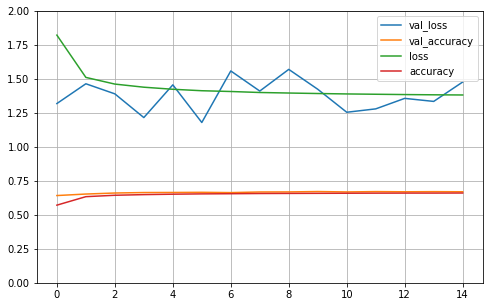

In [116]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2);

#### Saving model

In [120]:
model.save("conv_doodle_model.h5")


In [121]:
model_json = model.to_json()
with open("conv_doodle_model_json.json", "w") as json_file:
    json_file.write(model_json)